1. What type of machine learning problem is this?
regression problem 

2. How do the features relate to each other and to the weather conditions? 
correlation map shows the relation between variables

3. What are the steps involved in preprocessing the dataset for machine learning?
-cleaning null values 
-removing any incorrect data
-removing duplicates 
-removing not important columns 
-checking data types

4. How do we select the best model for our dataset?
by using different regression models (in this problem random forest is the best)

5. What metrics should we use to evaluate the performance of our weather prediction model?
-R^2 score
-Mean squared error  

6. Plot the predicted vs true values 
- in the end of the code

clearing the data

In [319]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
import seaborn as sns

In [320]:
data = pd.read_csv("Weather Dataset.csv")
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
3775,2006-08-11 02:00:00.000 +0200,Mostly Cloudy,rain,15.844444,15.844444,0.84,3.5259,315.0,14.9569,0.0,1009.37,Partly cloudy throughout the day.
3776,2006-12-26 12:00:00.000 +0100,Partly Cloudy,rain,2.488889,-1.516667,0.61,16.1000,53.0,9.9820,0.0,1038.38,Foggy starting overnight continuing until morn...
3777,2006-12-19 20:00:00.000 +0100,Overcast,rain,2.222222,-1.816667,0.92,15.9551,0.0,6.2951,0.0,1027.40,Overcast throughout the day.
3778,2006-12-10 11:00:00.000 +0100,Partly Cloudy,rain,8.794444,6.922222,0.83,11.6886,300.0,11.2056,0.0,1024.55,Foggy in the morning.


In [321]:
null = data.apply(pd.isnull).sum()
null #no null values

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [322]:
data.describe() # problem in temp humidity visibility loud cover (min value)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000
mean,9.473088,8.909559,0.280862,10.067603,200.250529,8.279035,-0.529101,995.943513
std,33.839341,9.863589,32.543577,6.029814,91.711950,32.992211,32.530002,148.644604
min,-2000.000000,-11.911111,-2000.000000,0.000000,0.000000,-2000.000000,-2000.000000,0.000000
25%,2.102778,-0.401389,0.710000,5.296900,145.000000,5.264700,0.000000,1010.760000
50%,10.250000,10.269444,0.860000,9.418500,192.000000,9.982000,0.000000,1015.180000
75%,17.088889,17.088889,0.930000,13.737325,280.000000,11.270000,0.000000,1023.590000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.000000,1042.310000


In [323]:
data.loc[data['Temperature (C)'] == -2000] = 0
data.loc[data['Humidity'] == -2000] = 0
data.loc[data['Visibility (km)'] == -2000] = 0
data.loc[data['Loud Cover'] == -2000] = 0
data.describe() #solved

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.000000,3780.0,3780.000000
mean,9.996057,8.900558,0.809275,10.055468,200.110053,8.799570,0.0,994.869434
std,8.734737,9.861072,0.162876,6.031269,91.870951,4.583422,0.0,152.129658
min,-8.594444,-11.911111,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.038889,-0.394444,0.710000,5.280800,145.000000,5.216400,0.0,1010.760000
50%,10.238889,10.238889,0.860000,9.410450,192.000000,9.982000,0.0,1015.180000
75%,17.088889,17.088889,0.930000,13.721225,280.000000,11.270000,0.0,1023.575000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.0,1042.310000


In [324]:
data.duplicated() # there are duplicates 

0       False
1       False
2       False
3       False
4       False
        ...  
3775     True
3776     True
3777     True
3778     True
3779     True
Length: 3780, dtype: bool

In [325]:
data =data.drop_duplicates()
data.duplicated() # no duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2515    False
2516    False
2517    False
2518    False
2519    False
Length: 2518, dtype: bool

In [326]:
data=data.drop(['Loud Cover'],axis=1) #not important zeros
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2515,2006-02-20 19:00:00.000 +0100,Partly Cloudy,rain,9.094444,6.594444,0.82,16.8084,129.0,9.9820,1010.08,Mostly cloudy starting overnight continuing un...
2516,2006-02-20 20:00:00.000 +0100,Mostly Cloudy,rain,8.905556,5.827778,0.78,21.8799,140.0,9.9820,1009.57,Mostly cloudy starting overnight continuing un...
2517,2006-02-20 21:00:00.000 +0100,Mostly Cloudy,rain,8.883333,5.527778,0.74,24.9228,150.0,15.8263,1009.60,Mostly cloudy starting overnight continuing un...
2518,2006-02-20 22:00:00.000 +0100,Mostly Cloudy,rain,8.266667,5.272222,0.77,19.3522,170.0,14.9569,1010.34,Mostly cloudy starting overnight continuing un...


In [327]:
data.dtypes #all data types are correct

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [328]:
date_parts=data['Formatted Date'].str.split(' ',expand=True)
data.insert(loc = 0 , column= 'Date',value= date_parts[0])
data.insert(loc = 1 , column= 'Time',value= date_parts[1])
data.insert(loc = 2 , column= 'Time zone',value= date_parts[2])
data = data.drop(columns='Formatted Date')
data #splitted the date from hours


,Date,Time,Time zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01,00:00:00.000,+0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01,01:00:00.000,+0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01,02:00:00.000,+0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01,03:00:00.000,+0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01,04:00:00.000,+0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2006-02-20,19:00:00.000,+0100,Partly Cloudy,rain,9.094444,6.594444,0.82,16.8084,129.0,9.9820,1010.08,Mostly cloudy starting overnight continuing un...
2516,2006-02-20,20:00:00.000,+0100,Mostly Cloudy,rain,8.905556,5.827778,0.78,21.8799,140.0,9.9820,1009.57,Mostly cloudy starting overnight continuing un...
2517,2006-02-20,21:00:00.000,+0100,Mostly Cloudy,rain,8.883333,5.527778,0.74,24.9228,150.0,15.8263,1009.60,Mostly cloudy starting overnight continuing un...
2518,2006-02-20,22:00:00.000,+0100,Mostly Cloudy,rain,8.266667,5.272222,0.77,19.3522,170.0,14.9569,1010.34,Mostly cloudy starting overnight continuing un...


In [329]:
data.dtypes

Date                         object
Time                         object
Time zone                    object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [330]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date                        datetime64[ns]
Time                                object
Time zone                           object
Summary                             object
Precip Type                         object
Temperature (C)                    float64
Apparent Temperature (C)           float64
Humidity                           float64
Wind Speed (km/h)                  float64
Wind Bearing (degrees)             float64
Visibility (km)                    float64
Pressure (millibars)               float64
Daily Summary                       object
dtype: object

In [331]:
numircal_data = data.select_dtypes(include=['float64','int64'])

<Axes: >

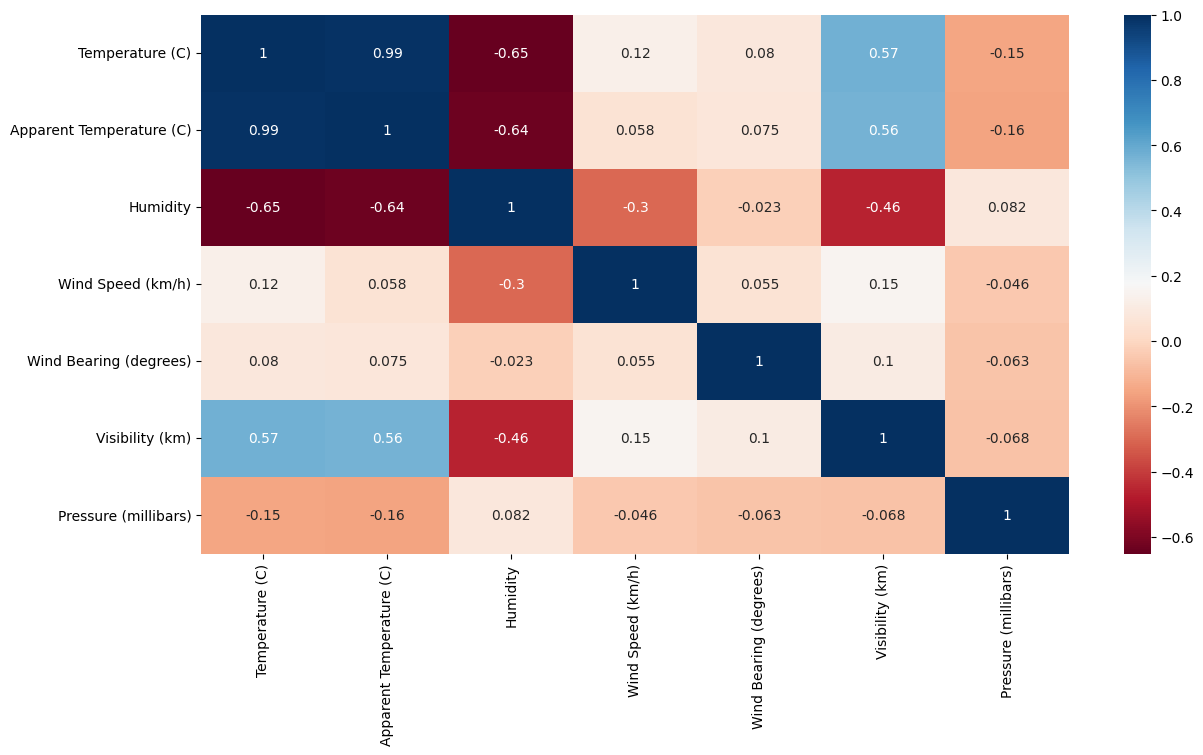

In [332]:
plt.figure(figsize=(14,7))
sns.heatmap(numircal_data.corr(),cmap='RdBu',annot=True)

predicting

In [333]:
x = numircal_data.drop('Temperature (C)',axis=1)
x = x.drop('Apparent Temperature (C)',axis=1)
y = numircal_data['Temperature (C)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=42)
reg = {
        'KNN' : KNeighborsRegressor(n_neighbors= 5),
        'Linear regression' : LinearRegression(),
        'AdaBoost' : AdaBoostRegressor(random_state= 42 , n_estimators= 100),
        'Random forest' : RandomForestRegressor(random_state= 42 , n_estimators= 100),
        'Decision tree' : DecisionTreeRegressor(random_state= 42),
        'Gradient boosting' : GradientBoostingRegressor(random_state= 42)
    }
result_errors = []
result_predictions=[]
for name, reg in reg.items():
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    result_errors.append([name, MSE, R2])
    result_predictions.append([y_pred])
headers = ["Algorithm", "Mean squared error", "R^2 score"]
print(tabulate(result_errors, headers=headers, tablefmt="grid"))

+-------------------+----------------------+-------------+
| Algorithm         |   Mean squared error |   R^2 score |
+===================+======================+=============+
| KNN               |              26.0497 |    0.668611 |
+-------------------+----------------------+-------------+
| Linear regression |              36.0069 |    0.541941 |
+-------------------+----------------------+-------------+
| AdaBoost          |              20.149  |    0.743677 |
+-------------------+----------------------+-------------+
| Random forest     |              10.4393 |    0.867197 |
+-------------------+----------------------+-------------+
| Decision tree     |              23.353  |    0.702917 |
+-------------------+----------------------+-------------+
| Gradient boosting |              14.2636 |    0.818547 |
+-------------------+----------------------+-------------+


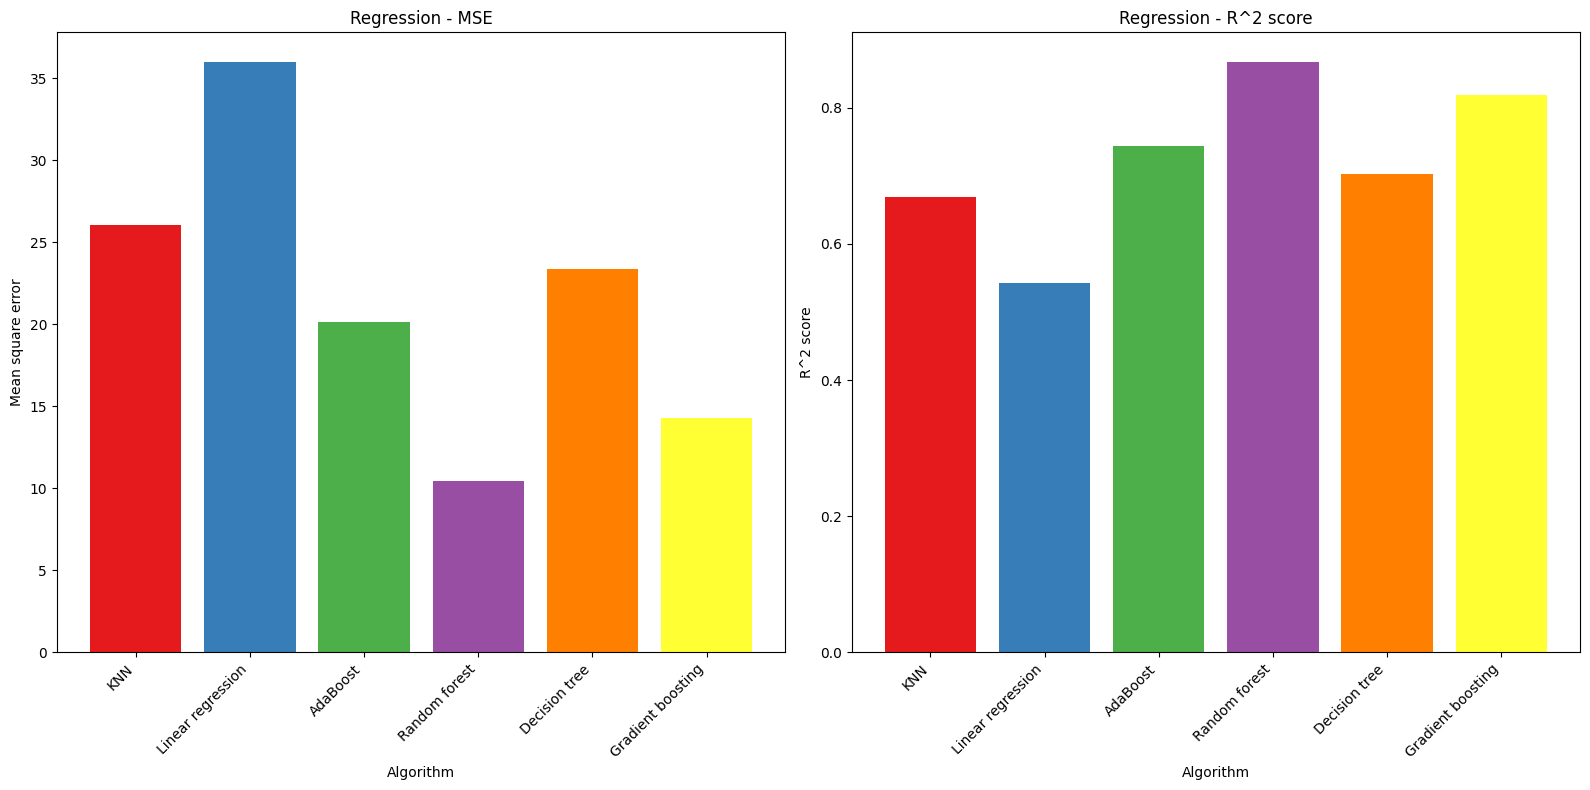

In [334]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
algorithm = [result[0] for result in result_errors]
MSE = [result[1] for result in result_errors]
R2 = [result[2] for result in result_errors]
plt.xlabel("Algorithm")
plt.ylabel('Mean square error')
plt.title("Regression - MSE")
colors = plt.cm._colormaps['Set1']
plt.xticks(rotation= 45,ha= 'right')
plt.bar(algorithm,MSE,color= colors(range(len(algorithm))))
plt.subplot(1,2,2)
plt.bar(algorithm,R2,color= colors(range(len(algorithm))))
plt.xticks(rotation= 45 ,ha= 'right' )
plt.xlabel("Algorithm")
plt.ylabel('R^2 score')
plt.title("Regression - R^2 score")
plt.tight_layout()
plt.show()

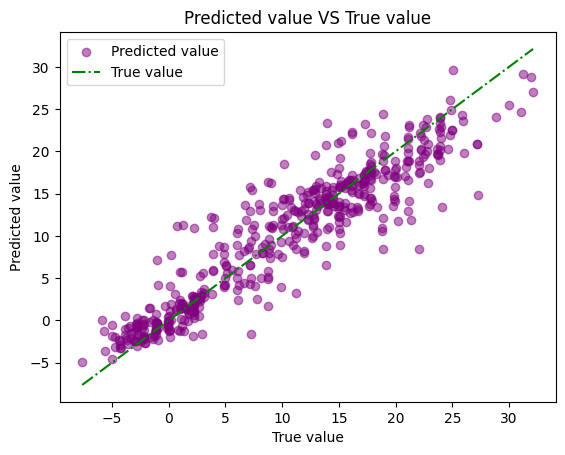

In [335]:
x = numircal_data.drop('Temperature (C)',axis=1)
x = x.drop('Apparent Temperature (C)',axis=1)
y = numircal_data['Temperature (C)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=42)
model= RandomForestRegressor(random_state= 42 , n_estimators= 100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.scatter(y_test,y_pred,color= "purple",alpha= 0.5,label= 'Predicted value')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="green", linestyle="-.",label= "True value")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.title("Predicted value VS True value")
plt.legend()